## O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
disponivel_preco = pd.read_csv('Previsão_NY.csv')
disponivel_preco.head()

,id,nome,id_anfitrião,nome_anfitrião,grupo_bairros,bairro,latitude,longitude,tipo_acomodação,preço,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,quantidade_calculada_anuncio_anfitrião,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [3]:
# Categorizar disponibilidade
disponivel_preco["disponibilidade_categoria"] = pd.cut(disponivel_preco   ["disponibilidade_365"], 
                                         bins=[0, 30, 180, 365], 
                                         labels=["Baixa (≤30 dias)", "Média (31-180 dias)", "Alta (>180 dias)"])

# Média de preço por categoria de disponibilidade
preco_por_disponibilidade = disponivel_preco.groupby("disponibilidade_categoria")["preço"].describe()
print(preco_por_disponibilidade)

                             count        mean         std  min    25%    50%  \
disponibilidade_categoria                                                       
Baixa (≤30 dias)            4558.0  133.303642   95.273976  0.0  72.25  110.0   
Média (31-180 dias)         9943.0  142.465654  195.716174  0.0  68.00  100.0   
Alta (>180 dias)           11653.0  162.701794  228.413078  0.0  70.00  115.0   

                             75%     max  
disponibilidade_categoria                 
Baixa (≤30 dias)           165.0  1400.0  
Média (31-180 dias)        169.0  9999.0  
Alta (>180 dias)           190.0  8500.0  


C:\Users\55119\AppData\Local\Temp\ipykernel_24868\3005369359.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preco_por_disponibilidade = disponivel_preco.groupby("disponibilidade_categoria")["preço"].describe()


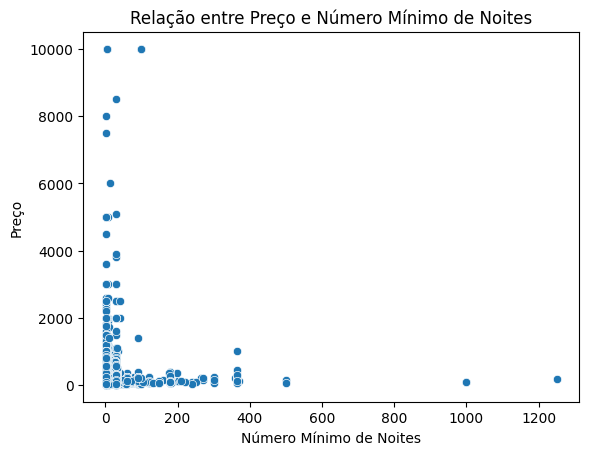

Correlação entre número mínimo de noites e preço: 0.02550604090578125


In [4]:
# Scatter plot entre preço e número mínimo de noites
sns.scatterplot(x=disponivel_preco["minimo_noites"], y=disponivel_preco["preço"])
plt.title("Relação entre Preço e Número Mínimo de Noites")
plt.xlabel("Número Mínimo de Noites")
plt.ylabel("Preço")
plt.show()

# Calcular a correlação entre as duas variáveis
correlacao = disponivel_preco["minimo_noites"].corr(disponivel_preco["preço"])
print("Correlação entre número mínimo de noites e preço:", correlacao)

A correlação entre número mínimo de noites e preço é 0.0255, o que indica que não há praticamente nenhuma relação entre as variáveis.

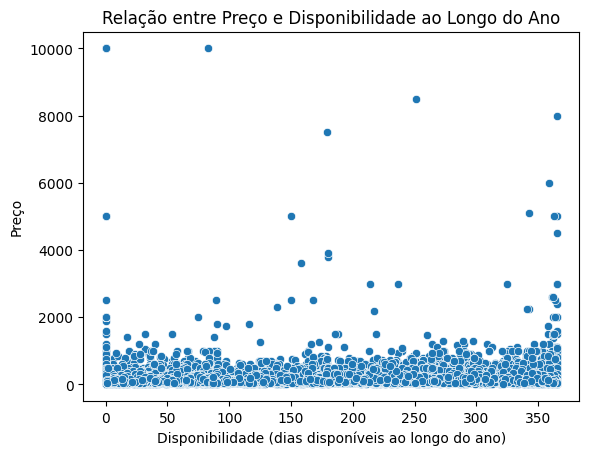

Correlação entre disponibilidade e preço: 0.0782356853241287


In [5]:
# Scatter plot entre preço e disponibilidade ao longo do ano
sns.scatterplot(x=disponivel_preco["disponibilidade_365"], y=disponivel_preco["preço"])
plt.title("Relação entre Preço e Disponibilidade ao Longo do Ano")
plt.xlabel("Disponibilidade (dias disponíveis ao longo do ano)")
plt.ylabel("Preço")
plt.show()

# Calcular a correlação entre as duas variáveis
correlacao_disponibilidade = disponivel_preco["disponibilidade_365"].corr(disponivel_preco["preço"])
print("Correlação entre disponibilidade e preço:", correlacao_disponibilidade)

O valor da correlação (0.078) sugere que quase não existe relação entre essas variáveis, ou seja, o preço dos aluguéis não parece ser influenciado pela quantidade de dias disponíveis no ano.

In [6]:
preco_medio_total = disponivel_preco['preço'].mean()
print("\nPreço médio total:", preco_medio_total)


Preço médio total: 142.31777457391485


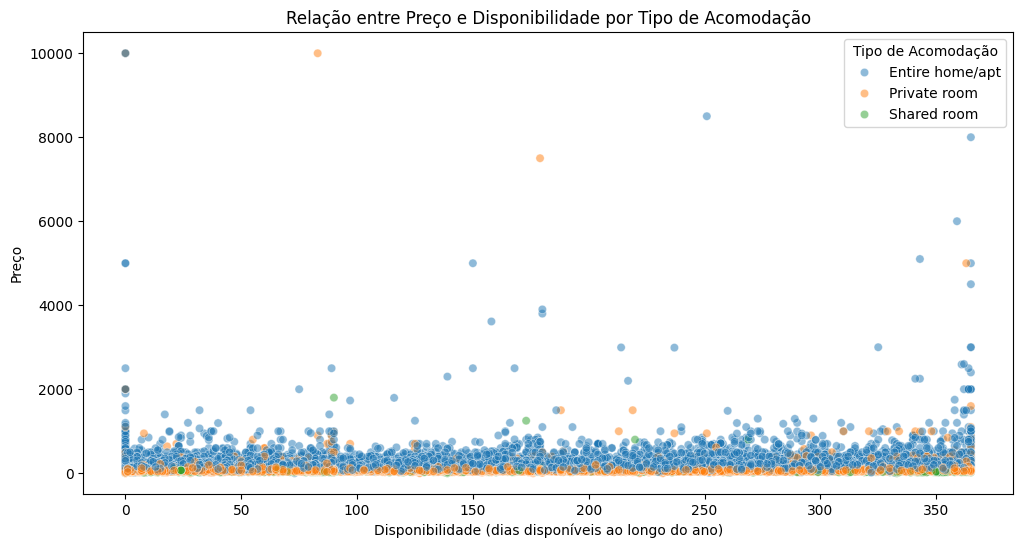

tipo_acomodação                     
Entire home/apt  disponibilidade_365    0.126268
Private room     disponibilidade_365    0.043354
Shared room      disponibilidade_365   -0.044855
Name: preço, dtype: float64


In [7]:
# Criar scatter plot separado por tipo de acomodação
plt.figure(figsize=(12, 6))
sns.scatterplot(data=disponivel_preco, x="disponibilidade_365", y="preço", hue="tipo_acomodação", alpha=0.5)
plt.title("Relação entre Preço e Disponibilidade por Tipo de Acomodação")
plt.xlabel("Disponibilidade (dias disponíveis ao longo do ano)")
plt.ylabel("Preço")
plt.legend(title="Tipo de Acomodação")
plt.show()

# Calcular a correlação para cada tipo de acomodação
correlacoes = disponivel_preco.groupby("tipo_acomodação")[["disponibilidade_365", "preço"]].corr().iloc[0::2, -1]
print(correlacoes)

Entire home/apt tem uma correlação levemente positiva (0.126), o que sugere que imóveis maiores e com mais disponibilidade tendem a ter preços um pouco mais altos;

Private room praticamente não tem correlação com a disponibilidade (0.043), o que indica que o número de dias disponíveis não afeta significativamente o preço;

Shared room tem uma correlação ligeiramente negativa (-0.045), o que pode indicar que acomodações compartilhadas mais caras tendem a ser menos disponíveis.

In [8]:
# Agrupar por 'bairro' e calcular o preço médio de cada grupo
preco_medio_por_bairro = disponivel_preco.groupby('bairro')['preço'].mean()
print(preco_medio_por_bairro)

bairro
Allerton            90.594595
Arden Heights       67.250000
Arrochar           118.250000
Arverne            158.515152
Astoria            116.018336
                      ...    
Willowbrook        249.000000
Windsor Terrace    130.687500
Woodhaven           62.722222
Woodlawn            60.090909
Woodside            89.852941
Name: preço, Length: 218, dtype: float64


In [9]:
# somando o total de acomodações em todos os bairros
contagem_bairros = disponivel_preco["bairro"].value_counts()
print (contagem_bairros)

bairro
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Olinville                2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64


In [10]:
# Obter os 10 maiores valores da Serie 
top_10 = contagem_bairros.nlargest (10, keep='all')

print(top_10)

bairro
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
East Village          1490
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: count, dtype: int64


In [11]:
#transformando a coluna preço em tipo numérico
disponivel_preco['preço'] = pd.to_numeric(disponivel_preco['preço'], errors='coerce')

In [12]:
#Calculando o preço médio dos 10 bairros com mais acomodaçoes
resultado = pd.merge(top_10, preco_medio_por_bairro, on='bairro')
print(resultado)

                    count       preço
bairro                               
Williamsburg         3163  139.812520
Bedford-Stuyvesant   3141  105.958930
Harlem               2206  117.093835
Bushwick             1944   85.117284
Hell's Kitchen       1532  186.093342
East Village         1490  174.793289
Upper West Side      1482  186.612686
Upper East Side      1405  167.303203
Crown Heights        1265  111.630830
Midtown               986  267.583164


In [13]:
# Ordena os bairros com valores médios mais altos
resultado_ordenado = resultado.sort_values(by='preço', ascending=False)
print(resultado_ordenado)

                    count       preço
bairro                               
Midtown               986  267.583164
Upper West Side      1482  186.612686
Hell's Kitchen       1532  186.093342
East Village         1490  174.793289
Upper East Side      1405  167.303203
Williamsburg         3163  139.812520
Harlem               2206  117.093835
Crown Heights        1265  111.630830
Bedford-Stuyvesant   3141  105.958930
Bushwick             1944   85.117284


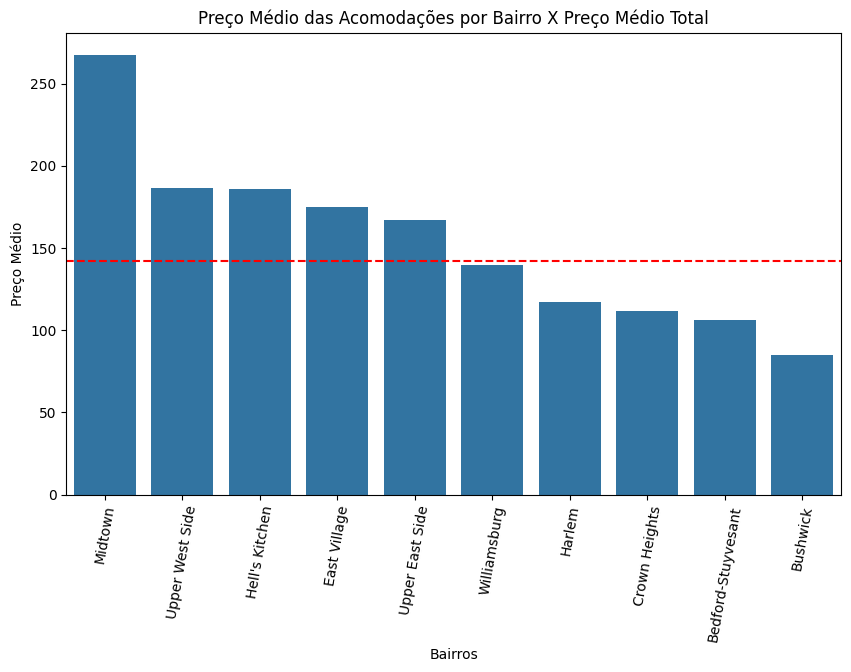

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bairro', y='preço', data=resultado_ordenado)
plt.axhline(preco_medio_total, color='red', linestyle='--', label='Preço Médio Total') #média de preços total
plt.xlabel('Bairros')
plt.ylabel('Preço Médio')
plt.title('Preço Médio das Acomodações por Bairro X Preço Médio Total')
plt.xticks(rotation=80)
plt.show()

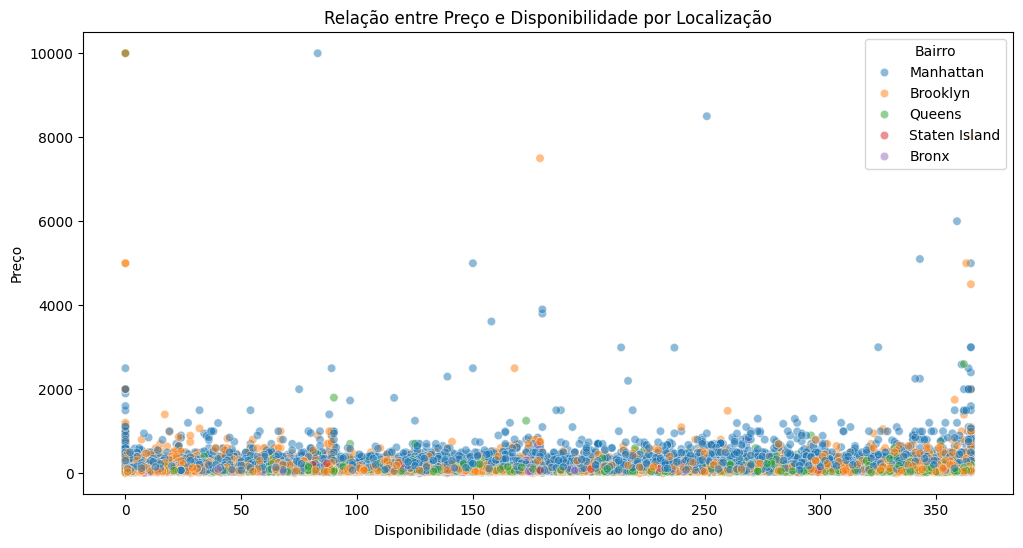

grupo_bairros                     
Bronx          disponibilidade_365    0.102139
Brooklyn       disponibilidade_365    0.060251
Manhattan      disponibilidade_365    0.136774
Queens         disponibilidade_365    0.020913
Staten Island  disponibilidade_365   -0.027548
Name: preço, dtype: float64


In [15]:
# Criar scatter plot separado por localização
plt.figure(figsize=(12, 6))
sns.scatterplot(data=disponivel_preco, x="disponibilidade_365", y="preço", hue="grupo_bairros", alpha=0.5)
plt.title("Relação entre Preço e Disponibilidade por Localização")
plt.xlabel("Disponibilidade (dias disponíveis ao longo do ano)")
plt.ylabel("Preço")
plt.legend(title="Bairro")
plt.show()

# Calcular a correlação entre disponibilidade e preço para cada grupo de bairro
correlacoes_bairros = disponivel_preco.groupby("grupo_bairros")[["disponibilidade_365", "preço"]].corr().iloc[0::2, -1]
print(correlacoes_bairros)

Manhattan e Bronx, existe uma leve tendência de que as acomodações com maior disponibilidade tenham preços mais altos;

Já em Staten Island, a ligeira correlação negativa pode indicar que acomodações mais caras tendem a ter menor disponibilidade (pode ser acomodações utilizadas em datas específicas).

In [16]:
# Seleção de variáveis
X = disponivel_preco[["minimo_noites", "disponibilidade_365"]]  # Variáveis independentes
X = sm.add_constant(X)  # Adiciona a constante (intercepto)
y = disponivel_preco["preço"]  # Variável dependente (preço)

# Ajustando o modelo
modelo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  preço   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     125.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           3.79e-55
Time:                        16:49:16   Log-Likelihood:            -2.6019e+05
No. Observations:               38842   AIC:                         5.204e+05
Df Residuals:                   38839   BIC:                         5.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 127.7896    